# 4.10 Answering the Key Questions

Part 1

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path = r'C:\Users\aaron\OneDrive\Documents\CF Analysis 4'

In [7]:
df_full = pd.read_pickle(os.path.join(path, '2 Data', 'Prepared Data', 'full_set+'))

Part 2

In [11]:
df_full.columns

Index(['product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'user_id', 'number_of_consecutive_orders', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'Busiest_days', 'busiest_period_of_day',
       'loyalty_flag', 'spending_flag', 'order_frequency_flag', 'Gender',
       'U.S. State', 'Age', '#dependants', 'Family Status', 'income', '_merge',
       'department'],
      dtype='object')

This set of columns dosn't contain any PII. One of the data sets used for this project did contain the names of our users, but I already removed those columns beforehand.

Part 3

In [16]:
result = []

for value in df_full['U.S. State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    else:
        result.append('West')

In [18]:
df_full['U.S. Region'] = result

In [20]:
crosstab = pd.crosstab(df_full['U.S. Region'], df_full['spending_flag'], dropna = False)

In [22]:
crosstab

spending_flag,High spender,Low spender
U.S. Region,,
Midwest,32526,7564799
Northeast,19771,5702965
South,44055,10747830
West,32428,8260485


Less than 1% of orders from all 4 U.S. regions come from high spending customers. From this, I can say that there are no significant differences in spending habits between these regions

Part 4

In [27]:
# I deleted the Max Order column in the previous section so I need to remake it here
df_full['max_order'] = df_full.groupby(['user_id'])['number_of_consecutive_orders'].transform(np.max)

C:\Users\aaron\AppData\Local\Temp\ipykernel_41672\2221364262.py:2: FutureWarning: The provided callable <function max at 0x00000257AAA1C5E0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_full['max_order'] = df_full.groupby(['user_id'])['number_of_consecutive_orders'].transform(np.max)


In [29]:
df_full.loc[df_full['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [31]:
df_full.loc[df_full['max_order'] >= 5, 'exclusion_flag'] = 'Do_Not_Exclude'

In [33]:
df_full['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Do_Not_Exclude    30964564
Exclude            1440295
Name: count, dtype: int64

In [35]:
df_full.shape

(32404859, 29)

In [37]:
# Creating new Subsets
df_less = df_full[df_full['exclusion_flag']=='Exclude']

In [39]:
df_less.shape

(1440295, 29)

In [41]:
# Export
df_less.to_pickle(os.path.join(path, '2 Data','Prepared Data', 'Excluded_Data'))

In [43]:
# Removing unwanted rows
df_full = df_full[df_full['exclusion_flag']=='Do_Not_Exclude']

In [45]:
df_full.shape

(30964564, 29)

Part 5

Making user profiles with the Age, #dependants, and income columns

In [50]:
df_full.loc[df_full['Age'] < 36, 'age_group'] = 'Young Adult'

In [52]:
df_full.loc[(df_full['Age'] >= 36) & (df_full['Age'] < 56), 'age_group'] = 'Middle-aged'

In [54]:
df_full.loc[df_full['Age'] >= 56, 'age_group'] = 'Older Adult'

In [56]:
df_full['age_group'].value_counts(dropna = False)

age_group
Older Adult    12508298
Middle-aged     9717461
Young Adult     8738805
Name: count, dtype: int64

In [58]:
df_full.loc[df_full['#dependants'] < 1, 'parent_status'] = 'Not a parent'

In [60]:
df_full.loc[df_full['#dependants'] >= 1, 'parent_status'] = 'Is a parent'

In [62]:
df_full['parent_status'].value_counts(dropna = False)

parent_status
Is a parent     23224883
Not a parent     7739681
Name: count, dtype: int64

In [64]:
df_full.loc[df_full['income'] < 56600, 'income_status'] = 'Low Income'

In [66]:
df_full.loc[(df_full['income'] >= 56600) & (df_full['income'] < 169800), 'income_status'] = 'Middle Income'

In [68]:
df_full.loc[df_full['income'] >= 169800, 'income_status'] = 'Upper Income'

In [70]:
df_full['income_status'].value_counts(dropna = False)

income_status
Middle Income    25729706
Low Income        4883075
Upper Income       351783
Name: count, dtype: int64

Part 6

Text(0.5, 1.0, 'Age Group Distribution')

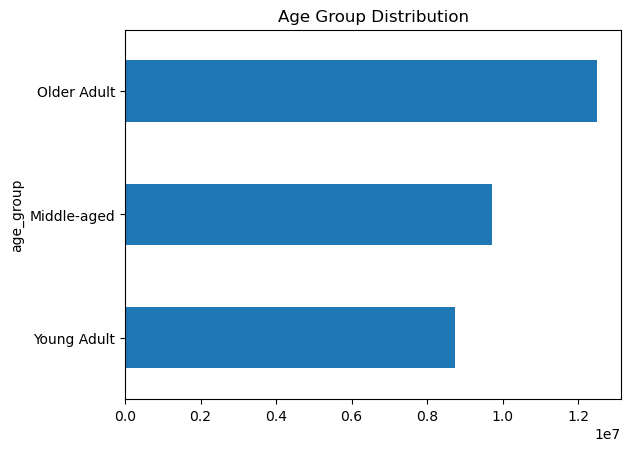

In [74]:
Bar_age = df_full['age_group'].value_counts(ascending = True).plot.barh()
plt.title('Age Group Distribution')

In [76]:
# Exporting Bar Chart
Bar_age.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_age_group'), bbox_inches='tight')

Text(0.5, 1.0, 'Parent Status Distribution')

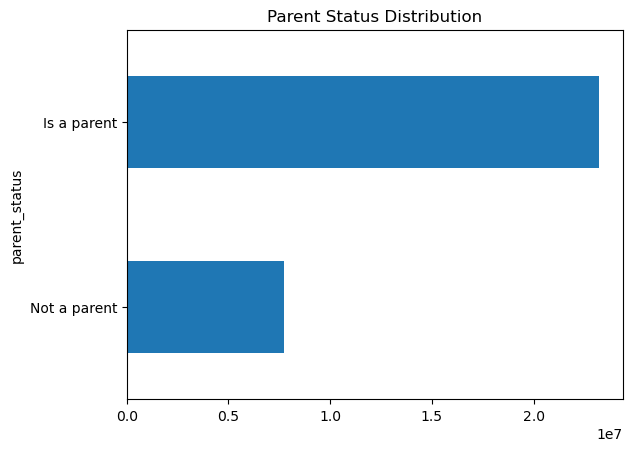

In [78]:
Bar_parent = df_full['parent_status'].value_counts(ascending = True).plot.barh()
plt.title('Parent Status Distribution')

In [80]:
# Exporting Bar Chart
Bar_parent.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_parent_status'), bbox_inches='tight')

Text(0.5, 1.0, 'Income Status Disrtibution')

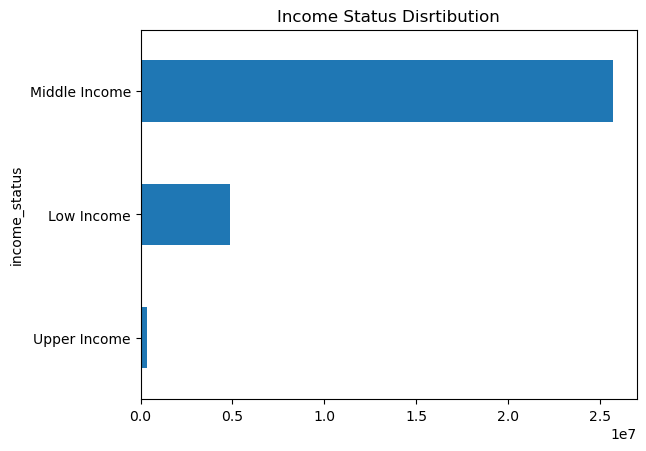

In [82]:
Bar_income = df_full['income_status'].value_counts(ascending = True).plot.barh()
plt.title('Income Status Disrtibution')

In [84]:
# Exporting Bar Chart
Bar_income.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_income_status'), bbox_inches='tight')

Part 7

In [88]:
df_full.loc[df_full['number_of_consecutive_orders'] >100, 'number_of_consecutive_orders'] = np.nan

In [90]:
# Aggregate for order frequency
df_full.groupby('age_group').agg({'number_of_consecutive_orders': ['max', 'mean', 'min']})

number_of_consecutive_orders                
                                     max       mean  min
age_group                                               
Middle-aged                         99.0  17.848614  1.0
Older Adult                         99.0  17.847365  1.0
Young Adult                         99.0  17.799115  1.0

In [92]:
df_full.groupby('parent_status').agg({'number_of_consecutive_orders': ['max', 'mean', 'min']})

number_of_consecutive_orders                
                                       max       mean  min
parent_status                                             
Is a parent                           99.0  17.792889  1.0
Not a parent                          99.0  17.957923  1.0

In [94]:
df_full.groupby('income_status').agg({'number_of_consecutive_orders': ['max', 'mean', 'min']})

number_of_consecutive_orders                
                                       max       mean  min
income_status                                             
Low Income                            99.0  17.090074  1.0
Middle Income                         99.0  17.949364  1.0
Upper Income                          99.0  19.734870  1.0

In [96]:
df_full.loc[df_full['prices'] >90, 'prices'] = np.nan

In [98]:
# Aggregate for prices
df_full.groupby('age_group').agg({'prices': ['max', 'mean', 'min']})

prices               
               max      mean  min
age_group                        
Middle-aged   25.0  7.790504  1.0
Older Adult   25.0  7.796799  1.0
Young Adult   25.0  7.785235  1.0

In [100]:
df_full.groupby('parent_status').agg({'prices': ['max', 'mean', 'min']})

prices               
                 max      mean  min
parent_status                      
Is a parent     25.0  7.791928  1.0
Not a parent    25.0  7.790456  1.0

In [102]:
df_full.groupby('income_status').agg({'prices': ['max', 'mean', 'min']})

prices               
                 max      mean  min
income_status                      
Low Income      25.0  6.978173  1.0
Middle Income   25.0  7.944980  1.0
Upper Income    25.0  7.861027  1.0

Part 8

In [106]:
# this is to get all the columns of the crosstabs to show up
pd.options.display.max_columns = None

In [108]:
# subset 1
df_north = df_full[df_full['U.S. Region']=='Northeast']

In [110]:
# subset 2
df_mid = df_full[df_full['U.S. Region']=='Midwest']

In [112]:
# subset 3
df_south = df_full[df_full['U.S. Region']=='South']

In [114]:
# subset 4
df_west = df_full[df_full['U.S. Region']=='West']

Age Groups by U.S. Regions and Departments

In [117]:
crosstab_age_north = pd.crosstab(df_north['age_group'], df_north['department'], dropna = False)

In [119]:
crosstab_age_mid = pd.crosstab(df_mid['age_group'], df_mid['department'], dropna = False)

In [121]:
crosstab_age_south = pd.crosstab(df_south['age_group'], df_south['department'], dropna = False)

In [123]:
crosstab_age_west = pd.crosstab(df_west['age_group'], df_west['department'], dropna = False)

In [125]:
crosstab_age_north

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-aged,8604,24212,60319,143126,35908,1770,54241,280688,54865,44165,114618,38264,13828,36360,3707,1848,95529,23013,4652,489171,150434
Older Adult,9331,27949,82660,191171,47154,2161,72471,372261,73422,59068,149993,51732,17964,49340,4621,2670,128836,30900,8524,650048,201613
Young Adult,7082,20551,56321,128632,34842,1668,50224,261667,50111,40584,105825,34608,12886,32871,3184,1750,88366,20852,4558,453785,141107


In [127]:
crosstab_age_mid

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-aged,10337,31485,85226,192754,49924,2377,76068,389673,75349,61668,161029,53839,19541,50253,4841,2599,134018,32222,6625,681893,207101
Older Adult,13360,37212,105202,239742,63188,3413,94827,483337,94039,78019,199126,66452,23919,63548,6157,3080,169674,40526,8028,862861,258570
Young Adult,10346,27044,71325,166483,43043,2139,66564,339480,65076,53776,138070,46701,17206,44459,4565,2304,116642,27650,6705,589361,179472


In [129]:
crosstab_age_south

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-aged,14685,44311,114648,267975,69967,3477,105184,534686,101840,85289,218158,72233,26740,69412,6735,3639,184289,45779,9617,948547,285052
Older Adult,19985,55743,148936,350551,88459,4380,135394,688565,134088,109409,289328,93984,33630,91695,8728,4582,238345,56926,12325,1215268,368144
Young Adult,14143,39457,108036,240893,64746,3323,96880,499765,97692,78115,202420,63844,24279,63013,6324,3358,169120,39791,7967,863661,263584


In [131]:
crosstab_age_west

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-aged,11277,34028,91289,204055,54888,2749,81487,416448,81759,66777,169992,55816,20844,53965,5118,2689,144411,33545,7603,733191,225123
Older Adult,14663,41987,115517,265137,69945,3500,105223,539998,104609,85160,222450,71584,26612,70816,6115,3358,184756,42695,9258,942900,285381
Young Adult,10814,26413,81349,181382,48786,2494,73511,370614,70984,60106,150722,50800,18542,49049,4673,2534,128719,30407,7198,648587,200825


Parent Status by U.S. Region and Departments

In [134]:
crosstab_parent_north = pd.crosstab(df_north['parent_status'], df_north['department'], dropna = False)

In [136]:
crosstab_parent_mid = pd.crosstab(df_mid['parent_status'], df_mid['department'], dropna = False)

In [138]:
crosstab_parent_south = pd.crosstab(df_south['parent_status'], df_south['department'], dropna = False)

In [140]:
crosstab_parent_west = pd.crosstab(df_west['parent_status'], df_west['department'], dropna = False)

In [142]:
crosstab_parent_north

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
parent_status,,,,,,,,,,,,,,,,,,,,,
Is a parent,17797,54687,149179,348464,88530,4173,132667,688377,134272,107874,278846,94747,33295,89348,8613,4638,234938,56018,12617,1198284,372839
Not a parent,7220,18025,50121,114465,29374,1426,44269,226239,44126,35943,91590,29857,11383,29223,2899,1630,77793,18747,5117,394720,120315


In [144]:
crosstab_parent_mid

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
parent_status,,,,,,,,,,,,,,,,,,,,,
Is a parent,24512,71033,195183,449886,116862,6165,178553,905545,175915,144684,374375,125820,45461,118709,11718,6034,315508,75741,16048,1597278,483667
Not a parent,9531,24708,66570,149093,39293,1764,58906,306945,58549,48779,123850,41172,15205,39551,3845,1949,104826,24657,5310,536837,161476


In [146]:
crosstab_parent_south

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
parent_status,,,,,,,,,,,,,,,,,,,,,
Is a parent,37406,104231,278625,641193,167913,8362,253545,1291683,248204,205610,531598,173717,63533,169172,16478,8621,445173,106996,23044,2271298,682804
Not a parent,11407,35280,92995,218226,55259,2818,83913,431333,85416,67203,178308,56344,21116,54948,5309,2958,146581,35500,6865,756178,233976


In [148]:
crosstab_parent_west

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
parent_status,,,,,,,,,,,,,,,,,,,,,
Is a parent,28085,77113,216446,487017,131113,6751,196289,997201,192061,159672,407564,134215,49241,131674,12024,6404,343182,79346,17749,1736972,536658
Not a parent,8669,25315,71709,163557,42506,1992,63932,329859,65291,52371,135600,43985,16757,42156,3882,2177,114704,27301,6310,587706,174671


Income Status by U.S. Region and Departments

In [151]:
crosstab_income_north = pd.crosstab(df_north['income_status'], df_north['department'], dropna = False)

In [153]:
crosstab_income_mid = pd.crosstab(df_mid['income_status'], df_mid['department'], dropna = False)

In [155]:
crosstab_income_south = pd.crosstab(df_south['income_status'], df_south['department'], dropna = False)

In [157]:
crosstab_income_west = pd.crosstab(df_west['income_status'], df_west['department'], dropna = False)

In [159]:
crosstab_income_north

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_status,,,,,,,,,,,,,,,,,,,,,
Low Income,4056,8667,28580,92458,22745,1111,21743,131081,27671,18356,54750,21461,6323,11051,1652,993,43936,12171,2276,218936,126407
Middle Income,19551,63780,168109,365497,93831,4484,153191,774050,149241,123923,311070,100852,37951,105706,9762,5175,265287,61736,14910,1361626,362097
Upper Income,1410,265,2611,4974,1328,4,2002,9485,1486,1538,4616,2291,404,1814,98,100,3508,858,548,12442,4650


In [161]:
crosstab_income_mid

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_status,,,,,,,,,,,,,,,,,,,,,
Low Income,5612,10687,37198,116673,28669,1520,29096,171161,35215,23846,73673,28753,7761,14982,2182,1272,57304,16273,3112,290437,164991
Middle Income,26623,84113,220514,473162,125390,6383,205402,1026201,196710,167102,418394,134278,52189,141343,13249,6595,357807,82683,17753,1826067,471659
Upper Income,1808,941,4041,9144,2096,26,2961,15128,2539,2515,6158,3961,716,1935,132,116,5223,1442,493,17611,8493


In [163]:
crosstab_income_south

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_status,,,,,,,,,,,,,,,,,,,,,
Low Income,8210,16786,52913,175324,43594,2158,43950,258092,52508,35052,106908,39611,11539,20700,3439,1762,85183,23406,4517,435297,242218
Middle Income,37723,121610,312953,672820,176594,9001,289500,1443293,277335,234603,593067,185519,72200,200522,18189,9619,498932,117272,24531,2567560,663789
Upper Income,2880,1115,5754,11275,2984,21,4008,21631,3777,3158,9931,4931,910,2898,159,198,7639,1818,861,24619,10773


In [165]:
crosstab_income_west

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_status,,,,,,,,,,,,,,,,,,,,,
Low Income,6241,11206,41014,131247,31736,1537,32732,191379,39645,26391,80957,31116,8381,16462,2505,1433,64152,16891,3309,321685,183048
Middle Income,28665,90371,242615,511665,139677,7199,223991,1120680,215370,183197,455665,143502,56905,155230,13274,6969,388207,88389,20269,1984805,520983
Upper Income,1848,851,4526,7662,2206,7,3498,15001,2337,2455,6542,3582,712,2138,127,179,5527,1367,481,18188,7298


Part 9

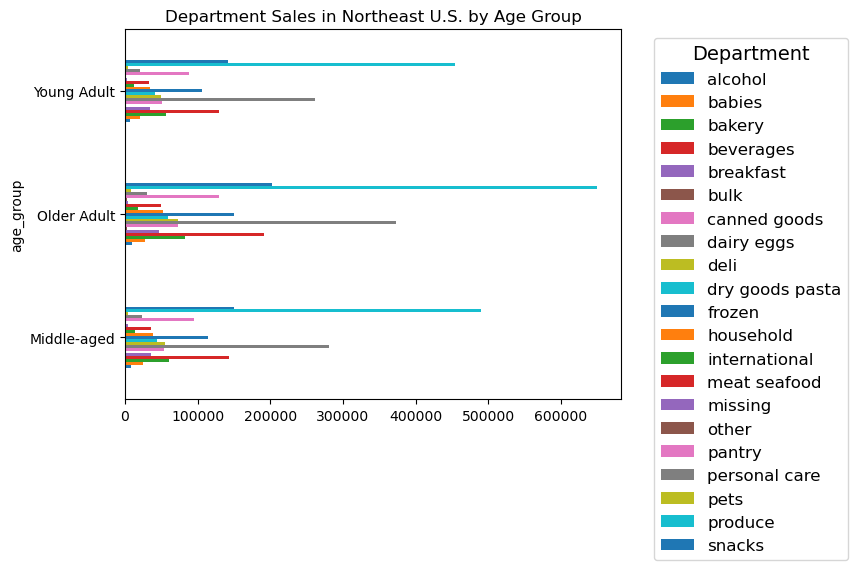

In [169]:
Bar_age_north = crosstab_age_north.plot.barh()
plt.title('Department Sales in Northeast U.S. by Age Group')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [171]:
# Exporting Bar Chart
Bar_age_north.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_age_north'), bbox_inches='tight')

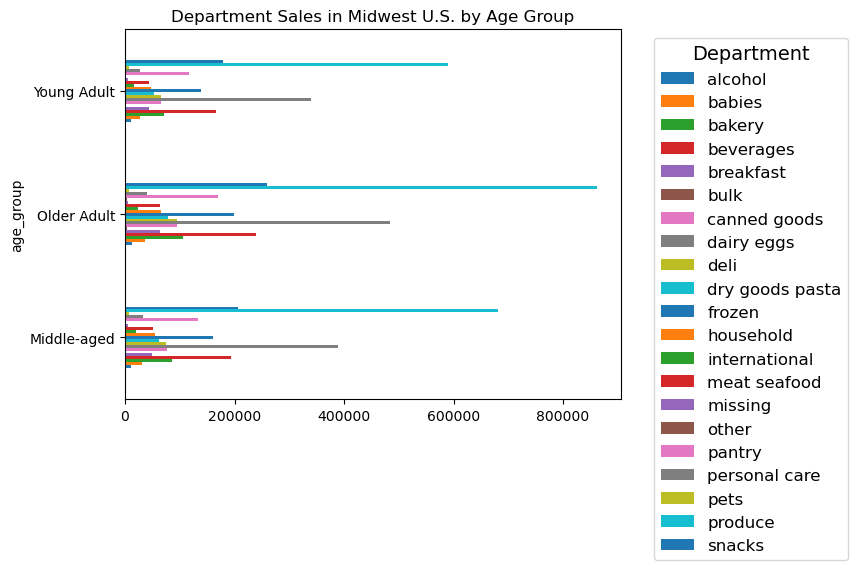

In [173]:
Bar_age_mid = crosstab_age_mid.plot.barh()
plt.title('Department Sales in Midwest U.S. by Age Group')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [175]:
# Exporting Bar Chart
Bar_age_mid.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_age_mid'), bbox_inches='tight')

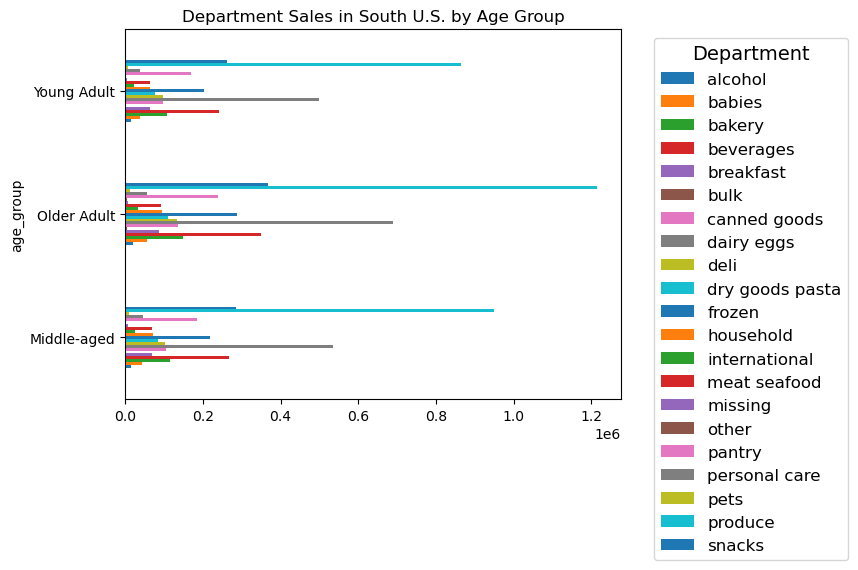

In [177]:
Bar_age_south = crosstab_age_south.plot.barh()
plt.title('Department Sales in South U.S. by Age Group')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [179]:
# Exporting Bar Chart
Bar_age_south.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_age_south'), bbox_inches='tight')

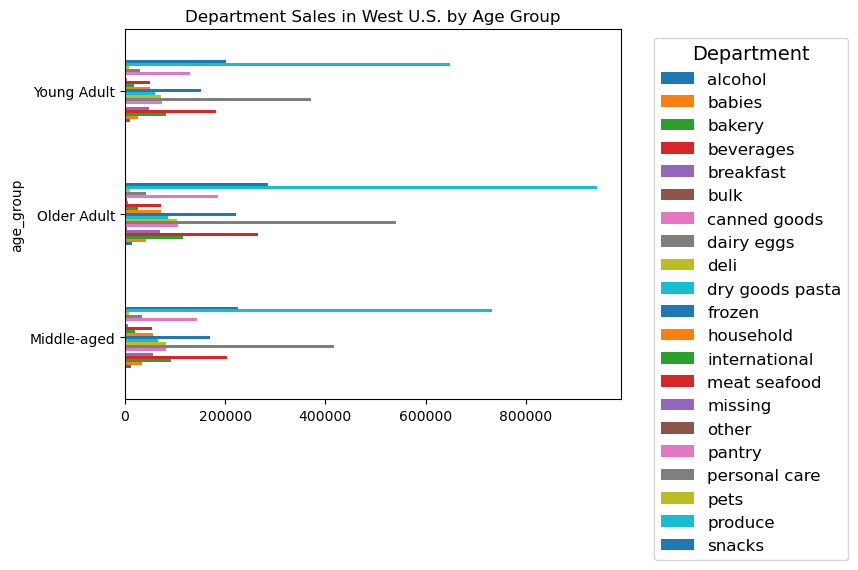

In [181]:
Bar_age_west = crosstab_age_west.plot.barh()
plt.title('Department Sales in West U.S. by Age Group')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [183]:
# Exporting Bar Chart
Bar_age_west.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_age_west'), bbox_inches='tight')

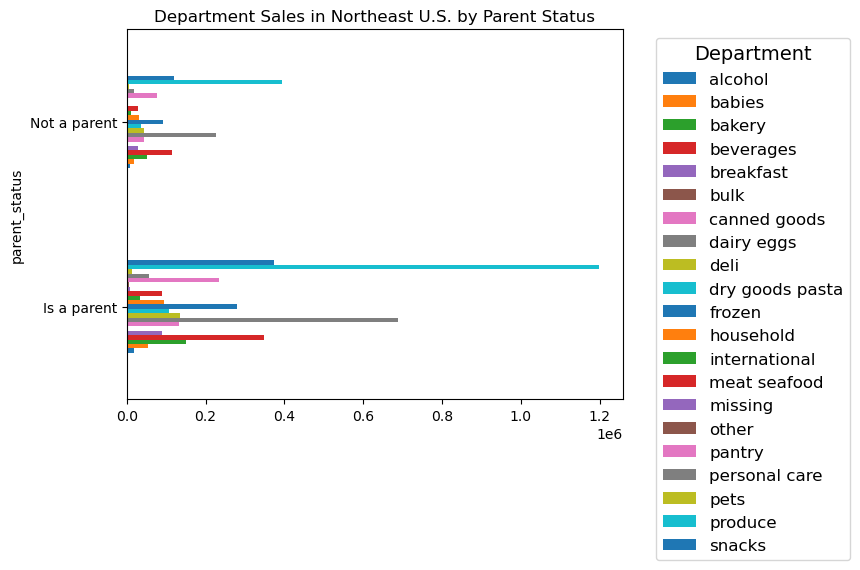

In [185]:
Bar_parent_north = crosstab_parent_north.plot.barh()
plt.title('Department Sales in Northeast U.S. by Parent Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [187]:
# Exporting Bar Chart
Bar_parent_north.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_parent_north'), bbox_inches='tight')

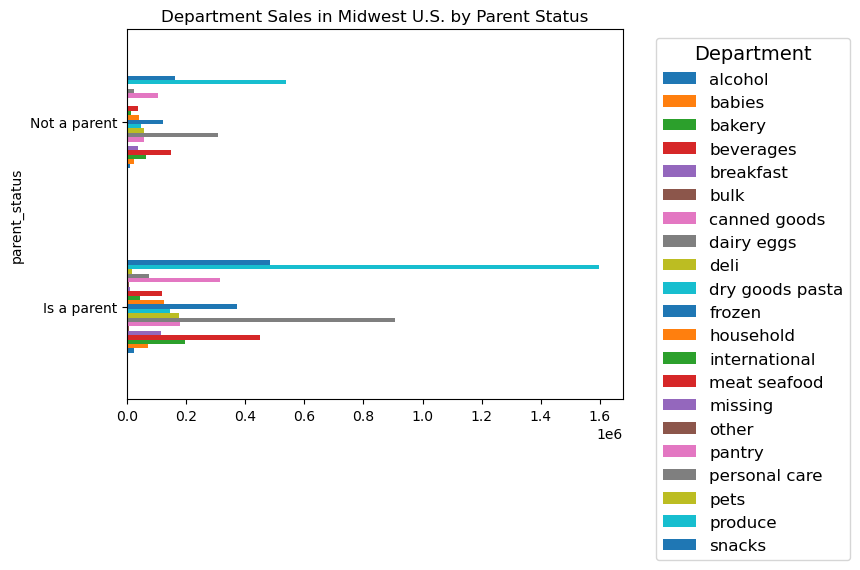

In [189]:
Bar_parent_mid = crosstab_parent_mid.plot.barh()
plt.title('Department Sales in Midwest U.S. by Parent Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [191]:
# Exporting Bar Chart
Bar_parent_mid .figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_parent_mid'), bbox_inches='tight')

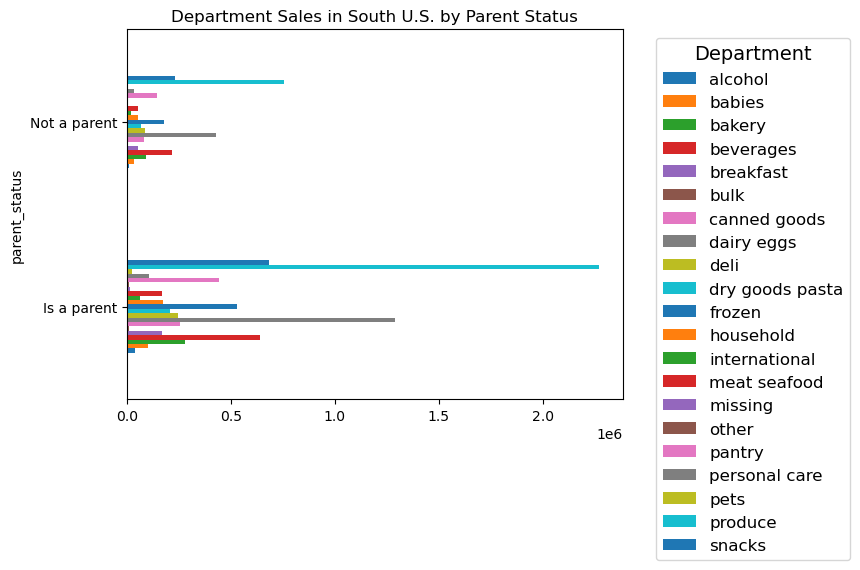

In [193]:
Bar_parent_south = crosstab_parent_south.plot.barh()
plt.title('Department Sales in South U.S. by Parent Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [195]:
# Exporting Bar Chart
Bar_parent_south.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_parent_south'), bbox_inches='tight')

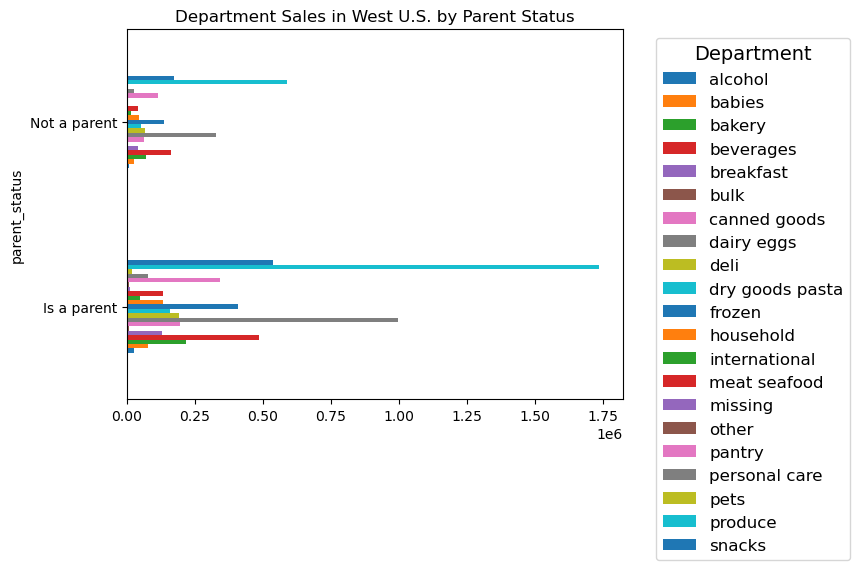

In [197]:
Bar_parent_west = crosstab_parent_west.plot.barh()
plt.title('Department Sales in West U.S. by Parent Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [199]:
# Exporting Bar Chart
Bar_parent_west.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_parent_west'), bbox_inches='tight')

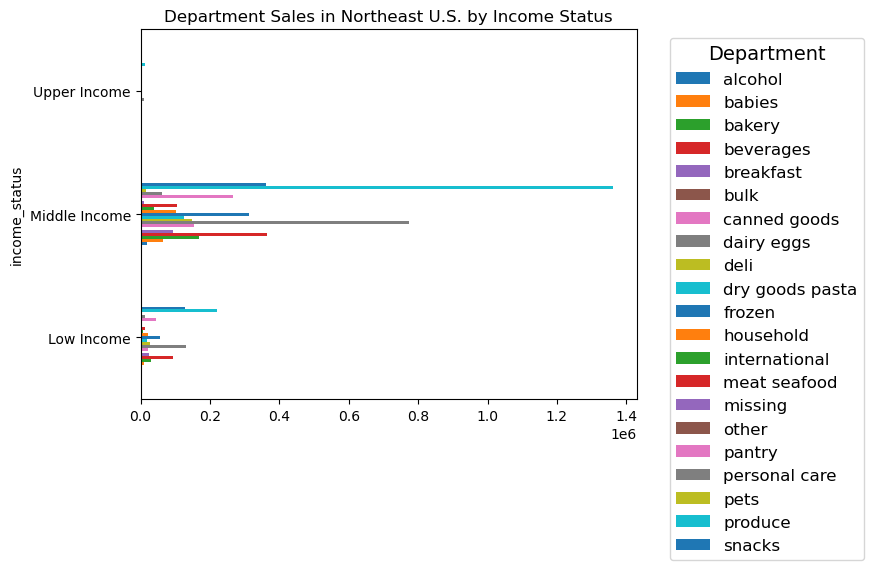

In [201]:
Bar_income_north = crosstab_income_north.plot.barh()
plt.title('Department Sales in Northeast U.S. by Income Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [203]:
# Exporting Bar Chart
Bar_income_north.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_income_north'), bbox_inches='tight')

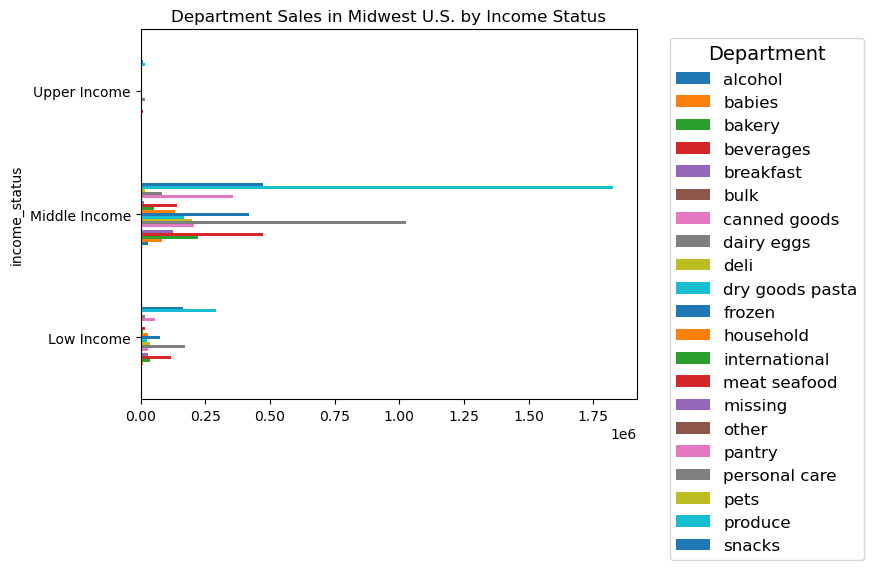

In [205]:
Bar_income_mid = crosstab_income_mid.plot.barh()
plt.title('Department Sales in Midwest U.S. by Income Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [207]:
# Exporting Bar Chart
Bar_income_mid .figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_income_mid'), bbox_inches='tight')

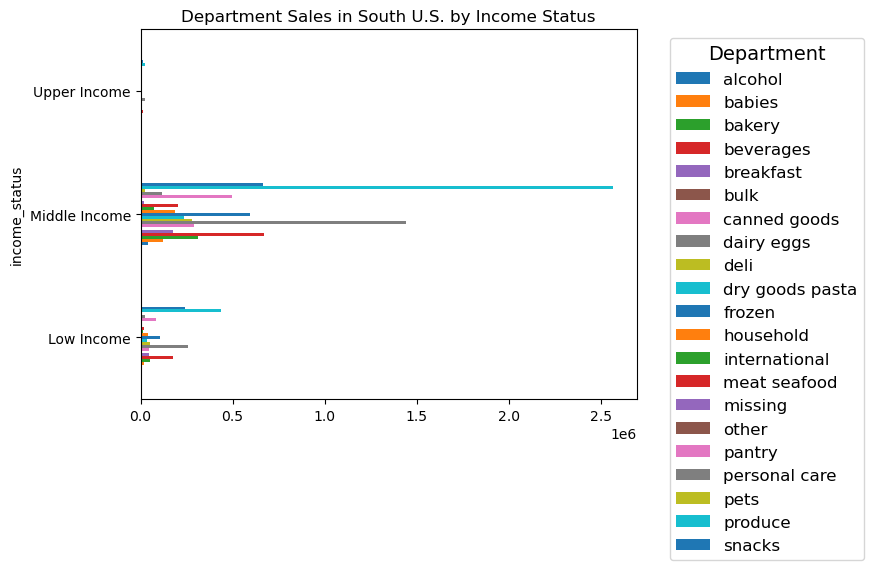

In [209]:
Bar_income_south = crosstab_income_south.plot.barh()
plt.title('Department Sales in South U.S. by Income Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [211]:
# Exporting Bar Chart
Bar_income_south.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_income_south'), bbox_inches='tight')

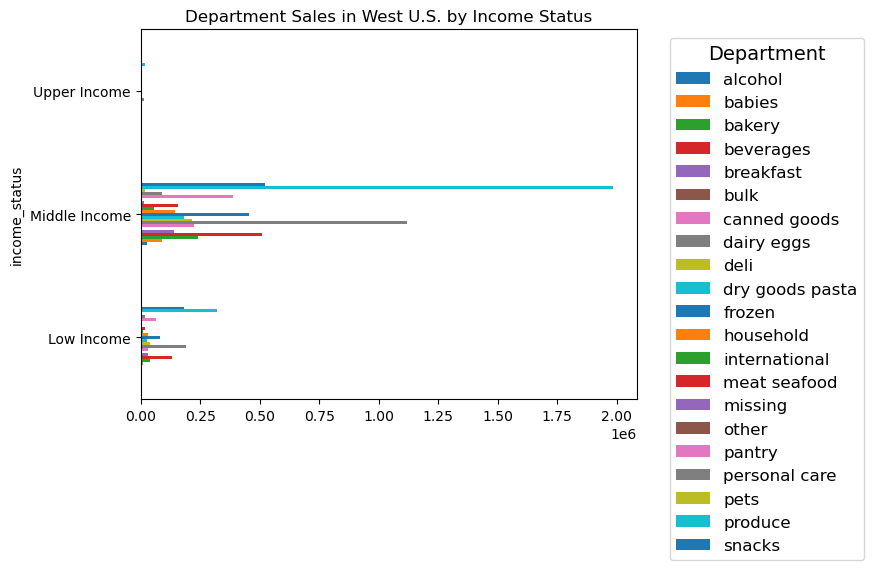

In [213]:
Bar_income_west = crosstab_income_west.plot.barh()
plt.title('Department Sales in West U.S. by Income Status')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [215]:
# Exporting Bar Chart
Bar_income_west.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_income_west'), bbox_inches='tight')

Part 10

In [ ]:
# Exporting
df_full.to_pickle(os.path.join(path, '2 Data','Prepared Data', 'final_set'))